<a href="https://colab.research.google.com/github/mohamedyosef101/101_learning_area/blob/area/Time%20Series/Aileen%20Nielsen%20-%20PyCon%202017/0.%2010%20minutes%20to%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pylab
import pandas as pd
import numpy as np

# Pandas data frames make data easy to see, references, and manipulate

very much copied from
http://pandas.pydata.org/pandas-docs/stable/10min.html

### You can create a data frame with a dictionary of lists

In [2]:
students = pd.DataFrame({'phone': ['555-1212', '555-1234', '555-1111', '555-2222'], 'age':[17, 17, 18, 18]}, index = ['Melanie', 'Bob', 'Vidhya', 'Ming'])
students

,phone,age
Melanie,555-1212,17
Bob,555-1234,17
Vidhya,555-1111,18
Ming,555-2222,18


In [3]:
students.index

Index(['Melanie', 'Bob', 'Vidhya', 'Ming'], dtype='object')

### You can also create a data frame with a numpy array and some column names

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=['Jenny', 'Frank', 'Wenfei', 'Arun', 'Mary', 'Ivan'], columns=list('ABCD'))
df

,A,B,C,D
Jenny,0.844178,-2.114407,2.386069,1.052320
Frank,0.146806,1.245907,-0.729445,0.966723
Wenfei,-0.956968,1.549834,-1.220016,0.470909
Arun,-0.924847,-0.370252,0.009444,0.339951
Mary,0.631355,0.722871,0.012316,0.667415
Ivan,0.327522,1.965056,0.977578,-0.714065


### There are also Series, which gets you all the functionality of a data frame when you have a 1-dimensional set of data with an index

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s.index = ['a', 'b', 'c', 'd', 'e', 'f']
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [7]:
s.isnull()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

### Dataframes and series play nice with plotting

<Axes: >

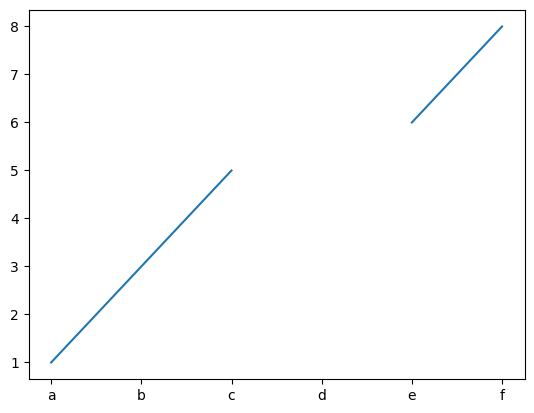

In [8]:
s.plot()

<Axes: >

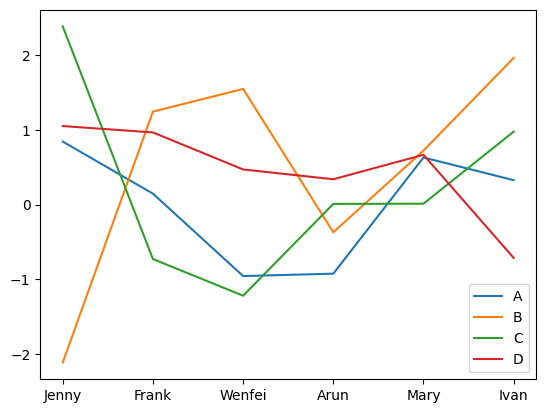

In [9]:
df.plot()

### Once you have a data frame, it's easy to see portions of your data that match what you want (same goes for series)

In [10]:
s[s.index > 'c']

d    NaN
e    6.0
f    8.0
dtype: float64

In [11]:
s[s.isnull() == False]

a    1.0
b    3.0
c    5.0
e    6.0
f    8.0
dtype: float64

In [12]:
students['age']

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [13]:
students.age

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [14]:
# 'selection by label'
students.loc['Melanie']

phone    555-1212
age            17
Name: Melanie, dtype: object

In [16]:
students.loc['Melanie', ['age', 'phone']]

age            17
phone    555-1212
Name: Melanie, dtype: object

In [17]:
# select by position
students.iloc[1, :]

phone    555-1234
age            17
Name: Bob, dtype: object

In [19]:
students.iloc[1, 1]

17

In [20]:
students[students['age'] > 17]

,phone,age
Vidhya,555-1111,18
Ming,555-2222,18


### It's also easy to summarize your data

In [21]:
students.age.mean()

17.5

In [22]:
students.age.max()

18

In [23]:
students.age.min()

17

### You can add information to an existing data frame

In [24]:
students['grade'] = [100, 97, 80, 85]

In [27]:
students[students['grade'] == students['grade'].max()]

,phone,age,grade
Melanie,555-1212,17,100


### You can also easily aggregate information

In [29]:
students.groupby('age').grade.mean()

age
17    98.5
18    82.5
Name: grade, dtype: float64

### You can even create categories to aggregate with on-the-fly

In [30]:
bins = np.linspace(70, 100, 3)
bins
students.groupby(np.digitize(students.grade, bins)).age.mean()

1    18.0
2    17.5
3    17.0
Name: age, dtype: float64

### Finally applying functions is also quite straight-forward

In [31]:
# First let's see what a lambda function looks like / does
f = lambda x: x + 1

In [32]:
f(4)

5

In [33]:
students.age.apply(lambda age: age + 1)

Melanie    18
Bob        18
Vidhya     19
Ming       19
Name: age, dtype: int64

### Let's take a look at some built methods we might want to apply

In [34]:
students.age.mean()

17.5

In [35]:
students.age.count()

4

In [36]:
students.corr()

<ipython-input-36-eb8da5b7e4a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students.corr()


,age,grade
age,1.000000,-0.968364
grade,-0.968364,1.000000


In [37]:
students.cummax()

,phone,age,grade
Melanie,555-1212,17,100
Bob,555-1234,17,100
Vidhya,555-1234,18,100
Ming,555-2222,18,100
